Random Forest

Dataset Description:

Use the Glass dataset and apply the Random forest model.

1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.


Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.

In [ ]:
## Load the dataset

In [2]:
import pandas as pd
# Load the Glass dataset
glass = pd.read_excel(r"C:\Users\Prekshitha Shetty\glass.xlsx",sheet_name = 'glass')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
glass['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [10]:
def remove_outliers(df):
  numerical_columns = df.select_dtypes(include = 'float64')
  for i in numerical_columns:
    Q1  = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + (IQR * 1.5)
    LL = Q1 - (IQR * 1.5)
    df = df[(df[i] >= LL) & (df[i] <= UL)]
  return df

out_data = remove_outliers(glass)
out_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.00,3
156,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.0,0.00,3
158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.0,0.00,3
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09,3


In [12]:
import pandas as pd

def remove_outliers(df, columns):

    numerical_columns = [col for col in columns if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        UL = Q3 + (IQR * 1.5)
        LL = Q1 - (IQR * 1.5)

        # Filter rows based on outlier criteria
        df = df[(df[column] >= LL) & (df[column] <= UL)]

    return df

selected_columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba' ]
out_data = remove_outliers(glass, columns=selected_columns)


In [14]:
out_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
...,...,...,...,...,...,...,...,...,...,...
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.00,3
156,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.0,0.00,3
158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.0,0.00,3
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09,3


In [16]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## 2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1500x1500 with 0 Axes>

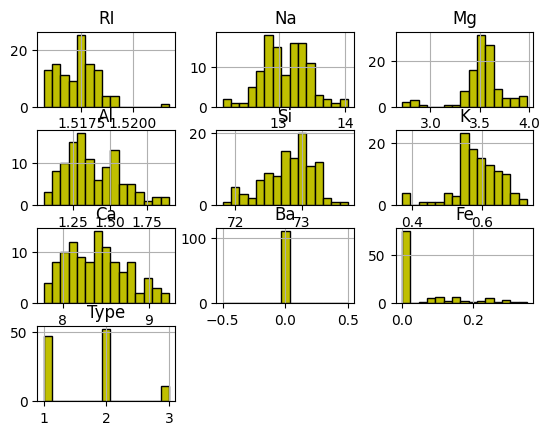

In [20]:
plt.figure(figsize = (15,15))
out_data.hist(bins = 15,color = 'y' , edgecolor = 'k')

<Axes: >

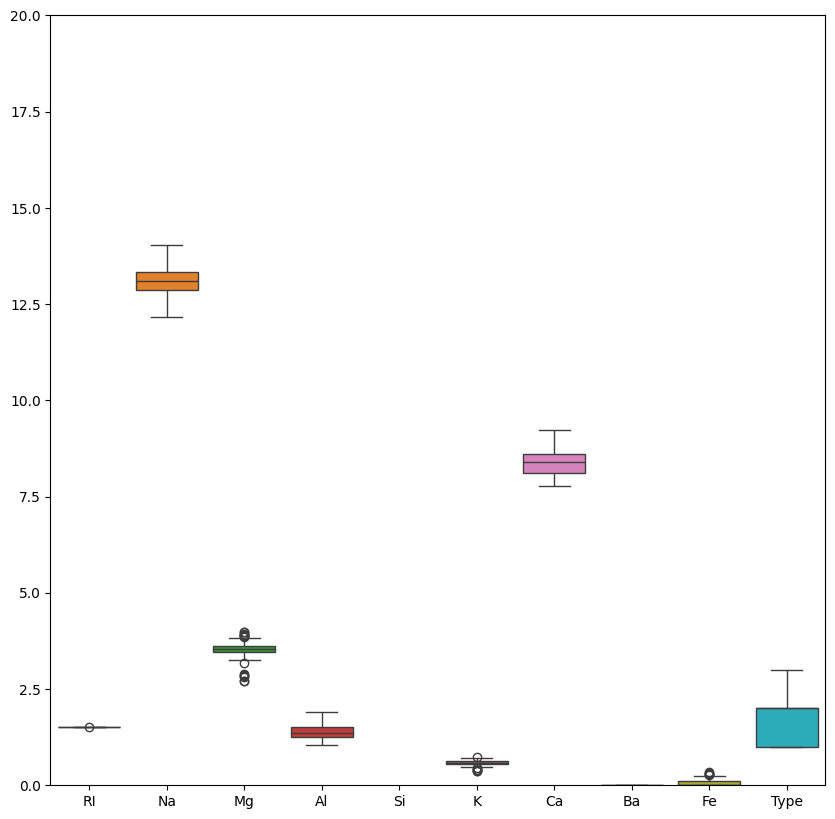

In [23]:
plt.figure(figsize=(10,10))
plt.ylim(0,20)
sns.boxplot(out_data)

C:\Users\Prekshitha Shetty\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


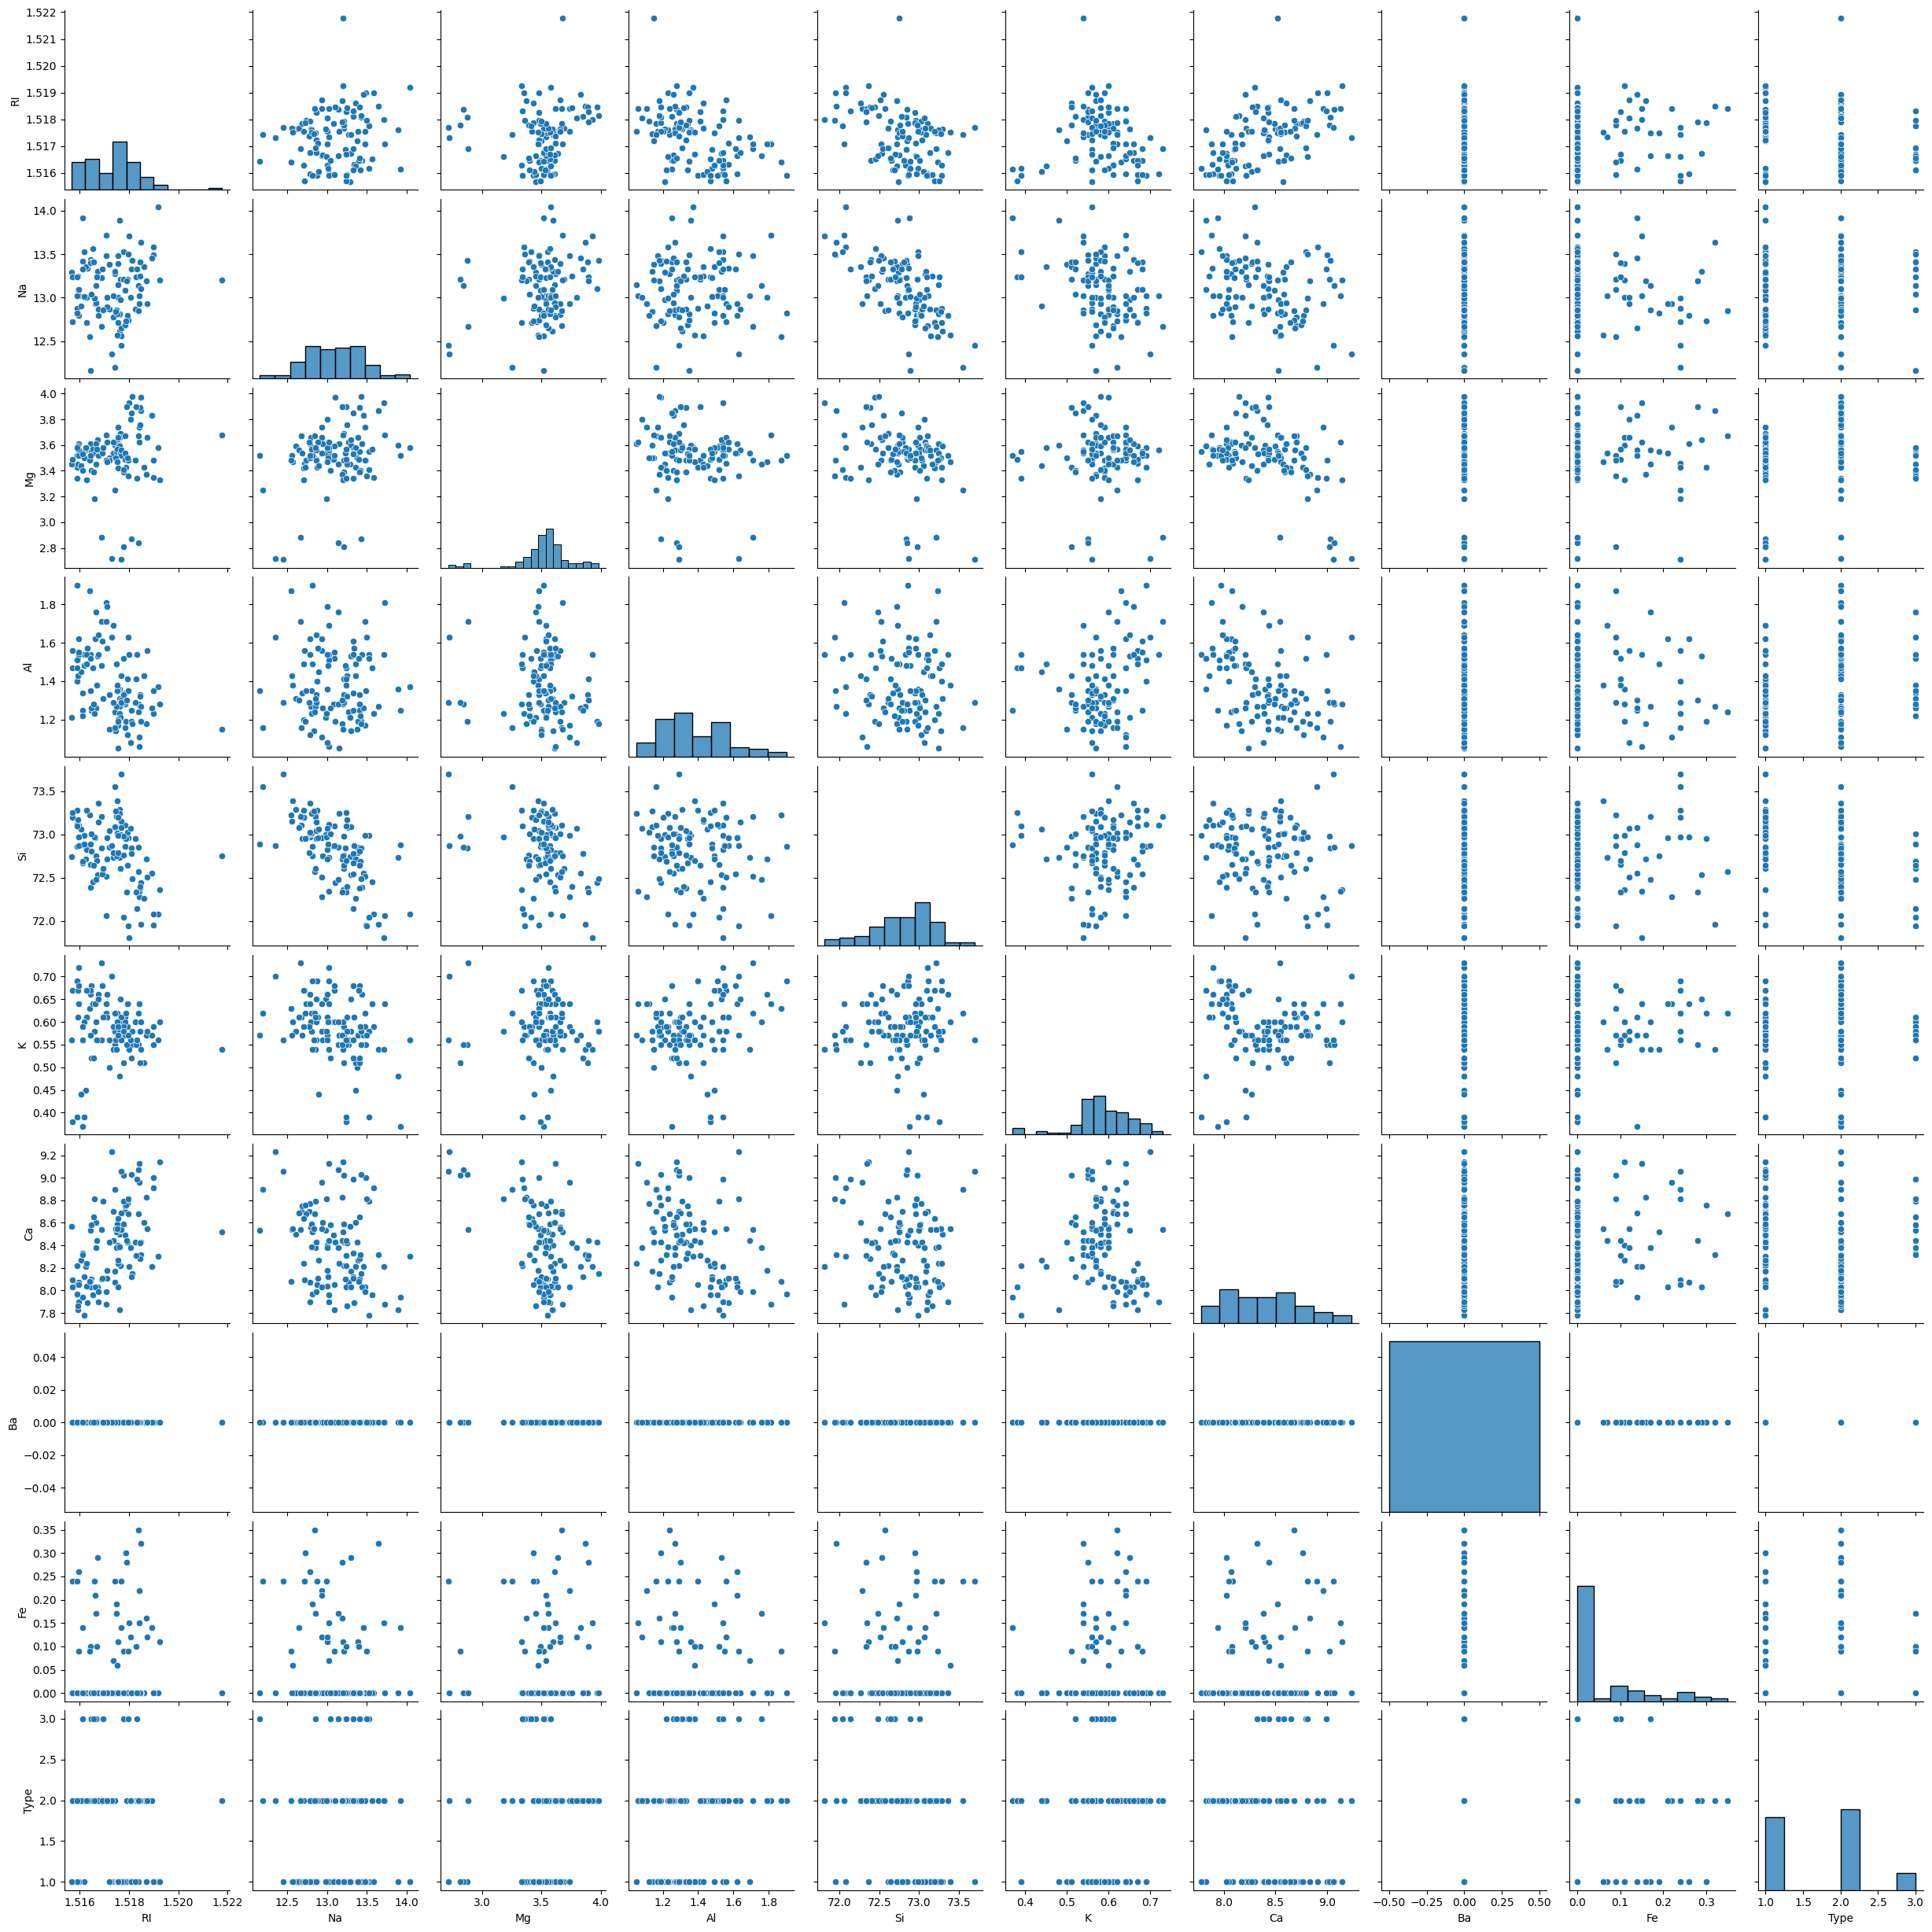

In [24]:
sns.pairplot(out_data)

In [26]:
out_data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,0.120672,0.135151,-0.434903,-0.402393,-0.115817,0.534660,NaN,0.069416,-0.255043
Na,0.120672,1.000000,0.264117,-0.014359,-0.645799,-0.367180,-0.310972,NaN,-0.141944,0.152502
Mg,0.135151,0.264117,1.000000,-0.114396,-0.324091,-0.066442,-0.469714,NaN,0.045243,0.096997
Al,-0.434903,-0.014359,-0.114396,1.000000,-0.099068,0.269518,-0.427514,NaN,-0.058987,0.322117
Si,-0.402393,-0.645799,-0.324091,-0.099068,1.000000,0.084983,-0.139979,NaN,-0.056008,-0.334517
K,-0.115817,-0.367180,-0.066442,0.269518,0.084983,1.000000,-0.042003,NaN,0.077949,0.036301
Ca,0.534660,-0.310972,-0.469714,-0.427514,-0.139979,-0.042003,1.000000,NaN,0.138130,-0.132904
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,0.069416,-0.141944,0.045243,-0.058987,-0.056008,0.077949,0.138130,NaN,1.000000,-0.015348
Type,-0.255043,0.152502,0.096997,0.322117,-0.334517,0.036301,-0.132904,NaN,-0.015348,1.000000


<Axes: >

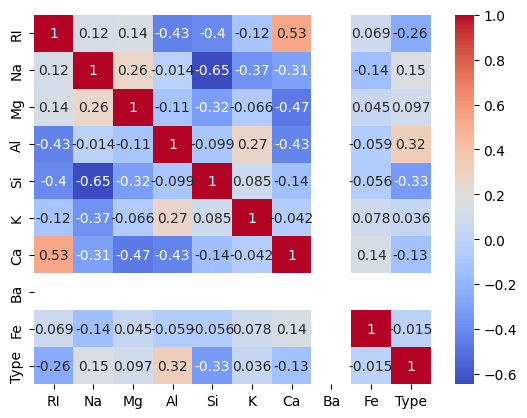

In [27]:
corr_matrix = out_data.corr()
sns.heatmap(corr_matrix,annot = True ,cmap = 'coolwarm')

In [28]:
out_data['Ba'].unique()

array([0.])

In [29]:
## Refractive index(RI) and calcium (Ca) has high correlation compare to others

<Axes: xlabel='RI', ylabel='Ca'>

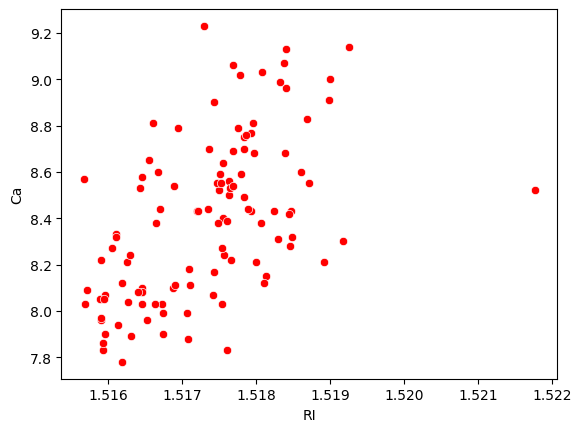

In [30]:
sns.scatterplot(out_data, x = 'RI' , y = 'Ca' , color = 'red' )

## 3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [32]:
out_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [33]:
x = out_data.iloc[:,:-1]
y = out_data.iloc[:,-1]

In [34]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(x)
#scaled_data

## 4: Random Forest Model Implementation

1. Divide the data into train and test split.

2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [39]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1],
      dtype=int64)

<Axes: >

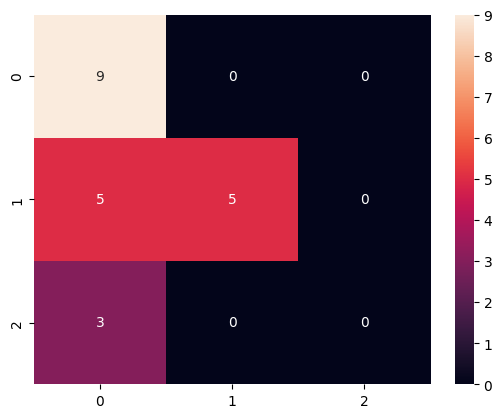

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True)

In [41]:
from sklearn.metrics import accuracy_score,precision_score,recall_score , f1_score

acc_score = accuracy_score(y_test,y_pred)
print('accuracy_score : ',acc_score)

prec_score = precision_score(y_test,y_pred , average = 'micro')
print('precision_score : ' , prec_score)

reca_score = recall_score(y_test,y_pred , average = 'micro')
print('recall_score', reca_score)

f_one_score = f1_score(y_test,y_pred , average = 'micro')
print('f1_score : ', f_one_score)

accuracy_score :  0.6363636363636364
precision_score :  0.6363636363636364
recall_score 0.6363636363636364
f1_score :  0.6363636363636364


## 5: Bagging and Boosting Methods

Apply the Bagging and Boosting methods and compare the results.

In [44]:
## bagging method

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(x_train, y_train)

y_pred = bagging_clf.predict(x_test)

print(f'Bagging Accuracy: {accuracy_score(y_test, y_pred)}')

Bagging Accuracy: 0.6818181818181818


In [48]:
## boosting method

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

boosting_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
boosting_clf.fit(x_train, y_train)

y_pred = bagging_clf.predict(x_test)

print(f'Bagging Accuracy: {accuracy_score(y_test, y_pred)}')

Bagging Accuracy: 0.6818181818181818


In [52]:
## the accuracy is 0.7142... it means the model trains with 71%

In [54]:
### Additional Notes:
#### 1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging and boosting are two popular ensemble learning techniques used to improve the performance and robustness of machine learning models by combining the predictions of multiple base models. While both methods aim to create a strong model from several weak models, they do so in different ways and are suitable for different types of problems.

### 1. **Bagging (Bootstrap Aggregating):**
- **Concept:**
  - Bagging is an ensemble method that aims to reduce variance and prevent overfitting by training multiple models (typically the same type of model) on different subsets of the data and then averaging their predictions (for regression) or taking a majority vote (for classification).
  
- **How It Works:**
  - **Bootstrap Sampling:** Multiple subsets of the original training dataset are created by randomly sampling with replacement. This means that some data points may appear multiple times in a subset, while others may not appear at all.
  - **Training Models:** A base model (e.g., decision tree) is trained independently on each subset of the data.
  - **Aggregating Predictions:** The predictions of all the models are combined by averaging (in regression) or by majority voting (in classification) to form the final prediction.

- **Example:**
  - Random Forest is a popular example of a bagging method, where multiple decision trees are trained on different subsets of data, and their outputs are averaged to make a final prediction.

- **Advantages:**
  - Reduces overfitting by averaging out noise.
  - Works well with high-variance models like decision trees.
  
- **Disadvantages:**
  - Less effective on models that are already low in variance (e.g., linear models).
  - Computationally intensive, as it requires training multiple models.

### 2. **Boosting:**
- **Concept:**
  - Boosting is an ensemble technique that builds models sequentially, with each new model focusing on correcting the errors made by previous models. The idea is to convert a series of weak models into a strong model by iteratively improving the model’s performance.

- **How It Works:**
  - **Sequential Training:** Models are trained one after another. Each new model is trained on the errors (misclassifications or residuals) of the previous models.
  - **Weight Adjustment:** In many boosting algorithms, instances that were misclassified by previous models are given more weight, so the new model focuses more on these difficult cases.
  - **Combining Models:** The final prediction is a weighted combination of the predictions from all the models, where more accurate models typically receive higher weights.

- **Example:**
  - AdaBoost (Adaptive Boosting), Gradient Boosting, and XGBoost are popular examples of boosting algorithms. Each one builds models sequentially and combines them in a way that emphasizes the correction of previous errors.

- **Advantages:**
  - Can significantly improve the accuracy of models, especially for complex datasets.
  - Focuses on difficult cases, potentially leading to better generalization.

- **Disadvantages:**
  - More prone to overfitting, especially if the number of models is too large or if the base models are too complex.
  - Computationally expensive due to the sequential nature of the training process.

### **Key Differences Between Bagging and Boosting:**

| **Aspect**               | **Bagging**                                   | **Boosting**                                      |
|--------------------------|-----------------------------------------------|---------------------------------------------------|
| **Model Training**        | Models are trained independently in parallel. | Models are trained sequentially, each correcting the errors of the previous ones. |
| **Purpose**               | Reduces variance and prevents overfitting.    | Reduces bias and improves model accuracy.         |
| **Focus**                 | Treats all models equally.                    | Focuses more on models that perform better or on difficult instances. |
| **Model Complexity**      | Typically uses high-variance models (e.g., decision trees). | Can use simpler models but often creates a more complex overall model. |
| **Risk of Overfitting**   | Lower, due to averaging of models.            | Higher, especially if over-trained on specific errors. |
| **Common Algorithms**     | Random Forest, Bagged Trees.                  | AdaBoost, Gradient Boosting, XGBoost, CatBoost.   |

### Summary:
- **Bagging** is best used when the primary concern is overfitting, particularly with high-variance models. It works by creating many versions of the model and averaging their predictions to stabilize and improve accuracy.
- **Boosting** is more suited for reducing bias and improving prediction accuracy by focusing on difficult cases where previous models made errors. It is more powerful but also more prone to overfitting if not properly controlled.

Both methods are powerful ensemble techniques, and the choice between them depends on the specific characteristics of the data and the problem at hand.